In [1]:
import numpy as np
from sklearn import model_selection
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("data.csv", delimiter = ",")     #loading data as numpy array

In [3]:
#checking shape of data
data.shape

(100, 2)

In [4]:
x = data[:,0]
y = data[:,1]

In [5]:
print(x.shape)
print(y.shape)

(100,)
(100,)


In [6]:
#splitting data into training and testing dataset
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80,)
(20,)
(80,)
(20,)


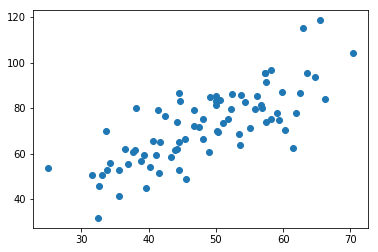

In [8]:
#visualizing training data
plt.scatter(x_train,y_train)
plt.show()

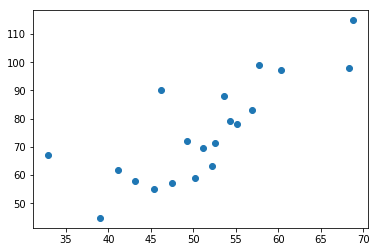

In [9]:
#visualizing testing data
plt.scatter(x_test,y_test)
plt.show()

# Self Implemented LR

In [10]:
#function that trains data on LinearRegression and returns parameters m & c
def fit(x,y):
    m = ((x*y).mean() - x.mean()*y.mean())/((x*x).mean() - (x.mean())**2)
    c = y.mean() - m*x.mean()
    return m,c

In [11]:
#function for predicting results for test data
def predict(x, m, c):
    y = m*x + c
    return y

In [12]:
def score(y_true, y_pred):
    u = ((y_true - y_pred)**2).sum()
    v = ((y_true - y_true.mean())**2).sum()
    s = 1 - u/v
    return s

In [13]:
m,c = fit(x_train, y_train)     #calling fit function to train model
print("m = ", m)
print("c = ", c)

m =  1.2685583796452273
c =  10.70850775170313


In [14]:
#getting predictions
y_pred_test = predict(x_test, m, c)
y_pred_train = predict(x_train, m, c)
print(y_pred_test.shape)
print(y_pred_train.shape)

(20,)
(80,)


In [15]:
score_test = score(y_test, y_pred_test)
print(score_test)

0.6017474980451247


In [16]:
score_train = score(y_train, y_pred_train)
print(score_train)

0.5931173391363997


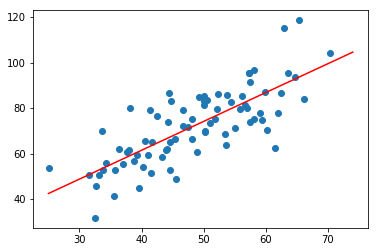

In [17]:
#Visualizing data and predicted line for training data
xGraph = np.arange(25,75)
yGraph = m*xGraph + c
plt.scatter(x_train, y_train)
plt.plot(xGraph,yGraph, "r")
plt.show()

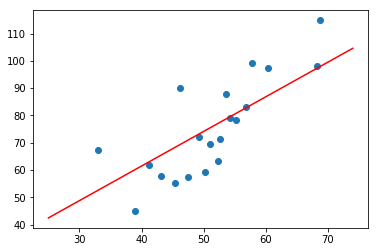

In [18]:
#Visualizing data and predicted line for test data
plt.scatter(x_test, y_test)
plt.plot(xGraph,yGraph, "r")
plt.show()

# SkLearn Linear Model LR

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
#to convert x_train to 2D array
x_train = x_train.reshape(-1,1)

In [21]:
#creating regressor object
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
#getting parameters from sklearn's LinerRegression
m = lr_clf.coef_[0]
c = lr_clf.intercept_
print(m)
print(c)

1.2685583796452333
10.70850775170284


In [23]:
x_test = x_test.reshape(-1,1)
score_test = lr_clf.score(x_test, y_test)
print(score_test)

0.6017474980451258


In [24]:
score_train = lr_clf.score(x_train, y_train)
print(score_train)

0.5931173391364


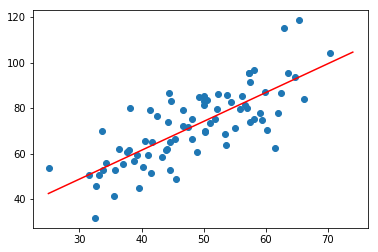

In [25]:
#Visualizing data and predicted line for training data
xGraph = np.arange(25,75)
yGraph = m*xGraph + c
plt.scatter(x_train, y_train)
plt.plot(xGraph,yGraph, "r")
plt.show()

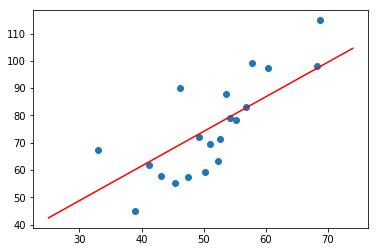

In [26]:
#Visualizing data and predicted line for test data
plt.scatter(x_test, y_test)
plt.plot(xGraph,yGraph, "r")
plt.show()